In [23]:
import matplotlib.pyplot as plt
import numpy as np
import pymc
import scipy.stats as stats

from multiprocessing import freeze_support
freeze_support()
    
plt.style.use("ggplot")

# Parameter values for prior and analytic posterior
n = 50
z = 10
alpha = 12
beta = 12
alpha_post = 22
beta_post = 52

# How many iterations of the Metropolis
# algorithm to carry out for MCMC
iterations = 100000

# Use pymc to construct a model context
basic_model = pymc.Model()

with basic_model:
    # Define our prior belief about the fairness
    # of the coin using a Beta distribution
    theta = pymc.Beta("theta",
                    alpha=alpha, beta=beta)

    # Define the Bernoulli likelihood function
    y = pymc.Binomial("y", n=n, p=theta, observed=z)

    # Carry out the MCMC analysis using the Metropolis algorithm
    # Use Maximum A Posteriori (MAP) optimisation as initial value for MCMC
    start = pymc.find_MAP()

    # Use the Metropolis algorithm (as opposed to NUTS or HMC, etc.)
    step = pymc.Metropolis()

    # Calculate the trace
    trace = pymc.sample(draws=iterations, step=step, initvals=start, random_seed=1, progressbar=True)

    


Multiprocess sampling (2 chains in 2 jobs)
Metropolis: [theta]


Sampling 2 chains for 1_000 tune and 100_000 draw iterations (2_000 + 200_000 draws total) took 241 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics


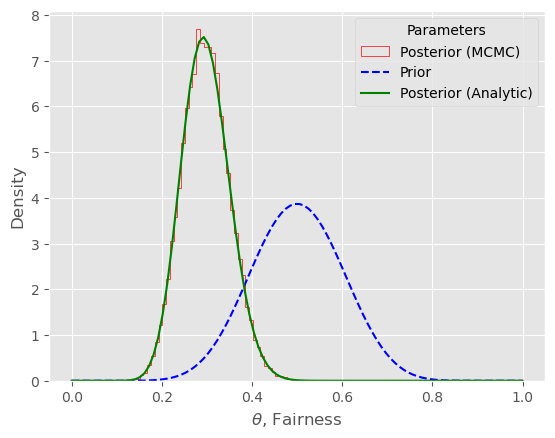

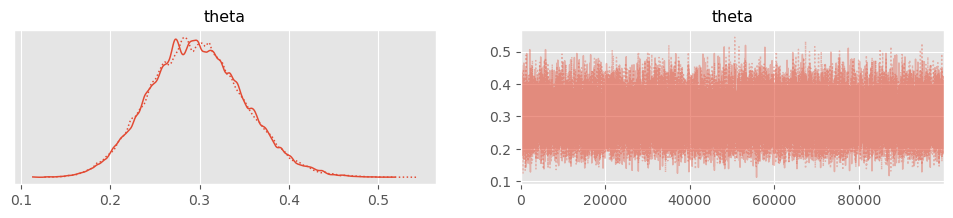

In [22]:
# Plot the posterior histogram from MCMC analysis
bins = 50
#print(trace.posterior.theta[0])

plt.hist(
    trace.posterior.theta[1], bins,
    histtype="step", density=True,
    label="Posterior (MCMC)", color="red"
)

# Plot the analytic prior and posterior beta distributions
x = np.linspace(0, 1, 100)
plt.plot(
    x, stats.beta.pdf(x, alpha, beta),
    "--", label="Prior", color="blue"
)
plt.plot(
    x, stats.beta.pdf(x, alpha_post, beta_post),
    label='Posterior (Analytic)', color="green"
)

# Update the graph labels
plt.legend(title="Parameters", loc="best")
plt.xlabel("$\\theta$, Fairness")
plt.ylabel("Density")
plt.show()

# Show the trace plot
pymc.plot_trace(trace)
plt.show()